In [1]:
import numpy as np
import matplotlib.pyplot as plt

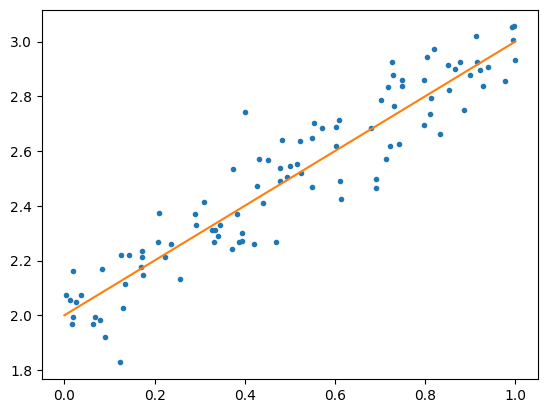

In [2]:
Slope = 1
Intercept = 2

NumberPoints = 100
NoiseVariance = 0.1

Xmin = 0
Xmax = 1

Ymin = Slope * Xmin + Intercept
Ymax = Slope * Xmax + Intercept

PointX = (Xmax-Xmin) * np.random.rand( NumberPoints , 1 ) + Xmin
PointY = Slope * PointX + Intercept

PointY = PointY + NoiseVariance * np.random.randn( NumberPoints , 1  )

plt.plot( PointX , PointY , '.' )
plt.plot( [Xmin,Xmax] , [Ymin,Ymax] )
plt.show()

Error =  57.51817084403588 Estimated Slope =  0.025780511323465906 Estimated Intercept 0.044993505918616374
Error =  52.93535746013122 Estimated Slope =  0.049088602382223054 Estimated Intercept 0.08849221485955011
Error =  55.573884611152394 Estimated Slope =  0.07906065785878108 Estimated Intercept 0.1329335035279131
Error =  53.95214176329288 Estimated Slope =  0.10798509760935247 Estimated Intercept 0.176733590604789
Error =  52.60262552509188 Estimated Slope =  0.13607082104939308 Estimated Intercept 0.2196972495253557
Error =  46.44329216898705 Estimated Slope =  0.16062012115299326 Estimated Intercept 0.2602782679034333
Error =  39.46912100129475 Estimated Slope =  0.1800010547170539 Estimated Intercept 0.29772498352221977
Error =  47.6033669148871 Estimated Slope =  0.2107570512685561 Estimated Intercept 0.33881146195980427
Error =  38.50174806472889 Estimated Slope =  0.2297893778182447 Estimated Intercept 0.3757716204968556
Error =  36.32386252133849 Estimated Slope =  0.2475

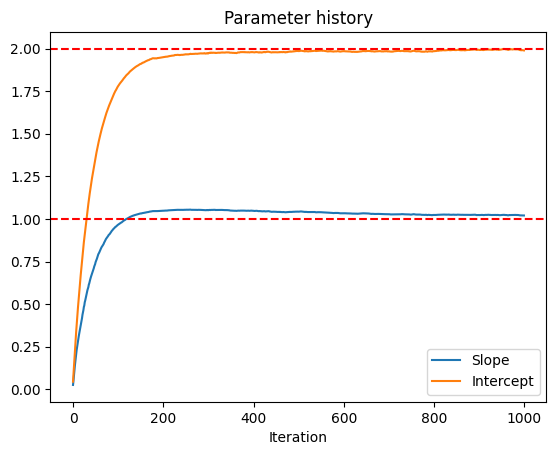

In [48]:
SlopeEstimate = 0
InterceptEstimate = 0

NumberIterations = 1000
LearningRate = 0.001
BatchSize = 10

SlopeHistory = []
InterceptHistory = []

for It in range( NumberIterations ):
    Index = np.random.permutation( len(PointX) )

    BatchPointX = PointX[ Index[1:BatchSize] ]
    BatchPointY = PointY[ Index[1:BatchSize] ]
    PointYEstimate = SlopeEstimate * BatchPointX + InterceptEstimate

    Error = np.sum( ( BatchPointY - PointYEstimate )**2 )
    dError_dSlope = np.sum( -2 * ( BatchPointY - PointYEstimate ) * BatchPointX )
    dError_dIntercept = np.sum( -2 * ( BatchPointY - PointYEstimate ) )

    SlopeEstimate = SlopeEstimate - LearningRate * dError_dSlope
    InterceptEstimate = InterceptEstimate - LearningRate * dError_dIntercept

    SlopeHistory = np.append( SlopeHistory , SlopeEstimate )
    InterceptHistory = np.append( InterceptHistory , InterceptEstimate )

    print("Error = ",Error, "Estimated Slope = ",SlopeEstimate, "Estimated Intercept",InterceptEstimate) 

plt.plot( SlopeHistory )
plt.plot( InterceptHistory )
plt.title( 'Parameter history' )
plt.xlabel( 'Iteration' )
plt.legend( ['Slope' , 'Intercept'] )
plt.axhline( y=Slope , color='r' , linestyle='--' )
plt.axhline( y=Intercept , color='r' , linestyle='--' )
plt.show()

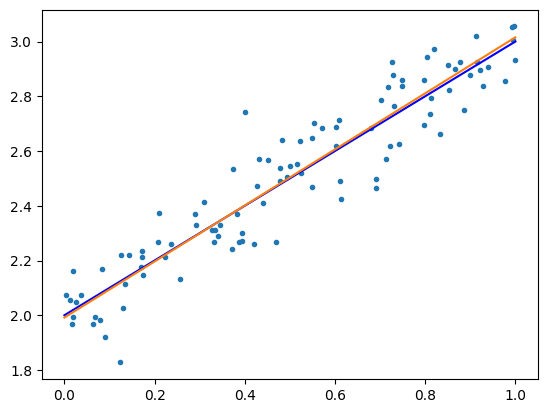

In [38]:
plt.plot( PointX , PointY , '.' )
plt.plot( [Xmin,Xmax] , [Ymin,Ymax] , 'b' )
plt.plot( [Xmin,Xmax] , [SlopeEstimate*Xmin+InterceptEstimate , SlopeEstimate*Xmax+InterceptEstimate])
plt.show()

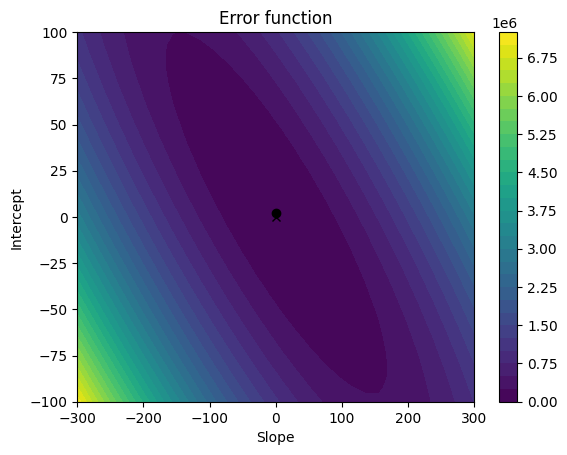

In [59]:
SlopeMax = 300
SlopeMin = -300

InterceptMax = 100
InterceptMin = -100

BatchSize = 10
GridSize = 30

Index = np.random.permutation( len(PointX) )

BatchPointX = PointX[ Index[1:BatchSize] ]
BatchPointY = PointY[ Index[1:BatchSize] ]

SlopeAxis = np.linspace( SlopeMin , SlopeMax , GridSize )
InterceptAxis = np.linspace( InterceptMin , InterceptMax , GridSize )

SlopeGrid , InterceptGrid = np.meshgrid( SlopeAxis , InterceptAxis )

ErrorGrid = np.zeros( [GridSize , GridSize] )
BatchErrorGrid = np.zeros( [GridSize , GridSize] )

for i in range(GridSize):
    for j in range(GridSize):
        PointYEstimate = SlopeGrid[i][j] * PointX + InterceptGrid[i][j]
        ErrorGrid[i][j] = np.sum( (PointY - PointYEstimate)**2 )

        PointYEstimate = SlopeGrid[i][j] * BatchPointX + InterceptGrid[i][j]
        BatchErrorGrid[i][j] = np.sum( (BatchPointY - PointYEstimate)**2 )

plt.contourf( SlopeGrid , InterceptGrid , ErrorGrid , 30 )
# plt.contour( SlopeGrid , InterceptGrid , BatchErrorGrid , 30 )
plt.plot( SlopeHistory[0] , InterceptHistory[0] , 'kx' )
plt.plot( SlopeHistory , InterceptHistory )
plt.plot( Slope , Intercept , 'ko' )
plt.colorbar()
plt.title( 'Error function' )
plt.xlabel( 'Slope' )
plt.ylabel( 'Intercept' )
plt.show()

In [14]:
(1:3)

SyntaxError: invalid syntax (305119237.py, line 1)